<h1>Exploratory Data Analysis</h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<h2>Importing the dataset and seeing the surface</h2>
In dataset, samples are ordered by first feature; shuffling them to discard any undesired outcome that might arise while developing the model

In [2]:
data = pd.read_csv('test_scores.csv')
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,DNQDD,Suburban,Public,ROP,Experimental,28.0,5SLAY,Male,Qualifies for reduced/free lunch,57.0,73.0
1,UUUQX,Suburban,Non-public,P8I,Standard,20.0,Z2G9R,Female,Qualifies for reduced/free lunch,61.0,73.0
2,VHDHF,Rural,Non-public,CD8,Experimental,20.0,GCN2Y,Male,Qualifies for reduced/free lunch,59.0,71.0
3,LAYPA,Rural,Public,AJ1,Standard,21.0,S2YL9,Male,Does not qualify,57.0,67.0
4,GOOBU,Urban,Public,HKF,Standard,28.0,6GLIV,Female,Qualifies for reduced/free lunch,37.0,44.0


Let's explore the features and examine some aspects of the categories that are notable

In [3]:
data.school_setting.unique()

array(['Suburban', 'Rural', 'Urban'], dtype=object)

In [4]:
data.school_type.unique()

array(['Public', 'Non-public'], dtype=object)

In [5]:
data.teaching_method.unique()

array(['Experimental', 'Standard'], dtype=object)

In [6]:
data.gender.unique()

array(['Male', 'Female'], dtype=object)

In [7]:
data.lunch.unique()

array(['Qualifies for reduced/free lunch', 'Does not qualify'],
      dtype=object)

<h3>gender</h3>

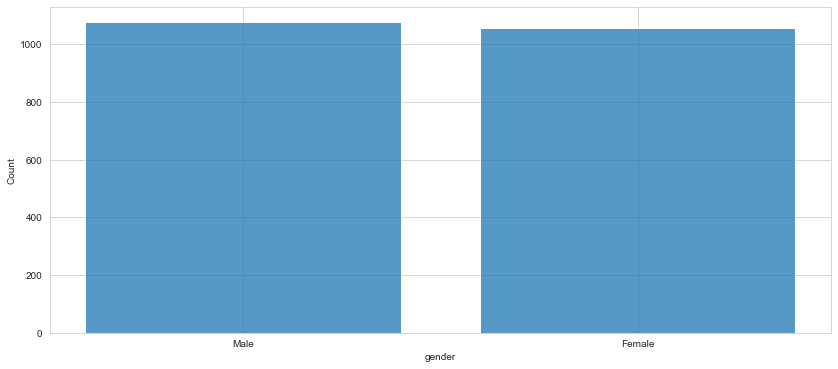

In [8]:
sns.set_style('whitegrid')
plt.subplots(figsize=(14, 6))
sns.histplot(data, x="gender", shrink=0.8)

<h3>school</h3>

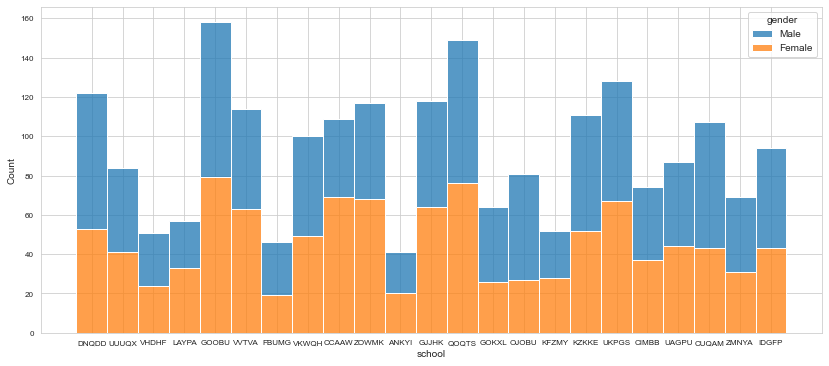

In [9]:
plt.subplots(figsize=(14, 6))
sns.histplot(data, x='school', hue="gender", multiple="stack").tick_params(labelsize=8.1)

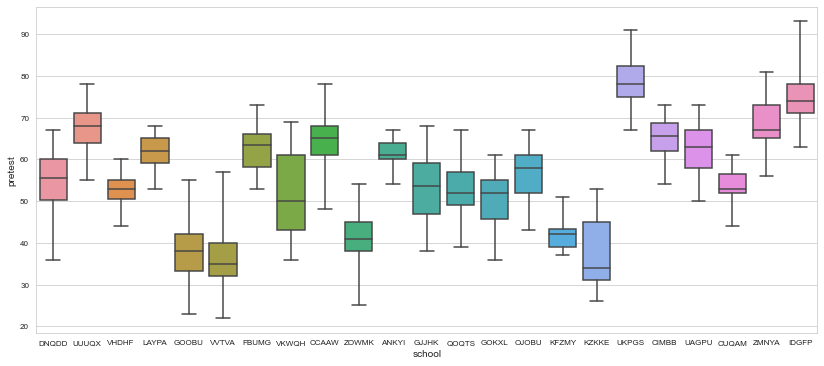

In [10]:
plt.subplots(figsize=(14, 6))
sns.boxplot(data=data, x="school", y="pretest", whis=np.inf).tick_params(labelsize=8.1)

<h3>school_setting</h3>

([<matplotlib.patches.Wedge at 0x13237798d90>,
 [Text(0.2576168712005097, 1.0694080360988785, 'Urban'),
  Text(-0.918145305049163, -0.6058128414091101, 'Suburban'),
  Text(0.803991674335455, -0.7507312352628415, 'Rural')],
 [Text(0.14051829338209618, 0.5833134742357519, '42.5%'),
  Text(-0.5008065300268161, -0.33044336804133273, '33.6%'),
  Text(0.4385409132738845, -0.4094897646888226, '23.9%')])

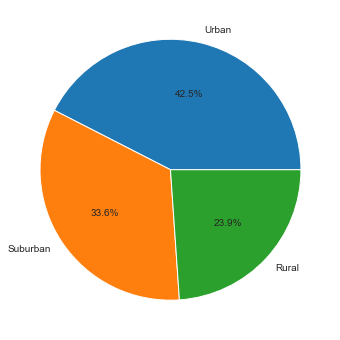

In [11]:
plt.subplots(figsize=(14,6))
plt.pie(data.school_setting.value_counts(), labels=data.school_setting.value_counts().index, autopct='%1.1f%%')

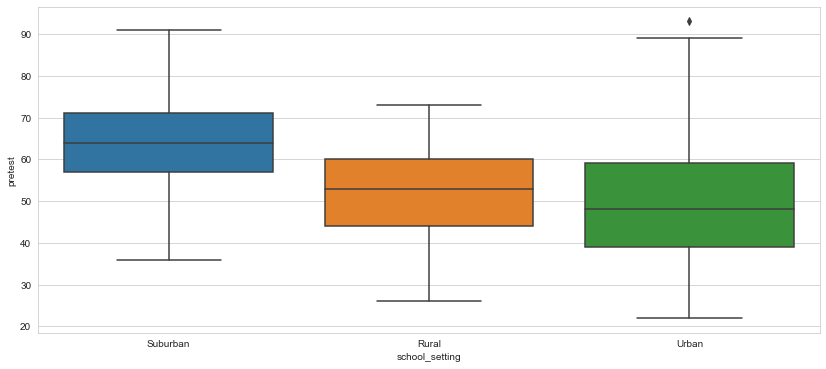

In [12]:
plt.subplots(figsize=(14, 6))
sns.boxplot(data=data,x="school_setting",y="pretest")

<h3>teaching_method</h3>

Is teaching_method same for every classroom of a school or every classroom has different teaching_method?

In [13]:
data.teaching_method[data.school == 'UUUQX'].value_counts()

Standard        51
Experimental    33
Name: teaching_method, dtype: int64

In [14]:
for classroom in data.classroom.value_counts().index.to_list():
    if len(data.teaching_method[data.classroom == classroom].value_counts().index.to_list()) != 1:
        print('error')

Last prompt printed nothing, so teaching_method changes over classrooms

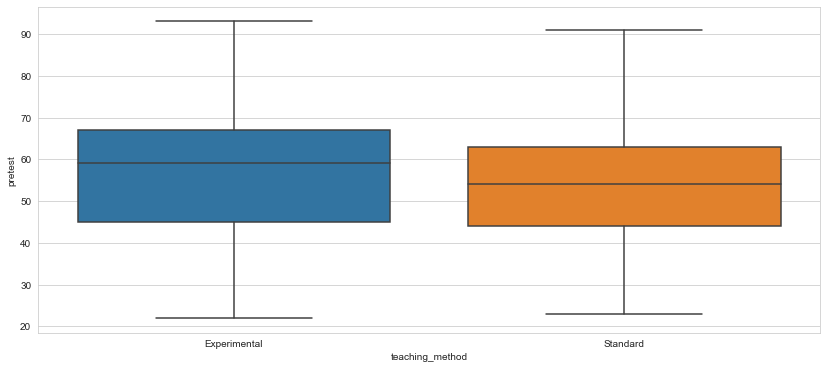

In [15]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=data,x="teaching_method",y="pretest")

<h3>school_type</h3>

([<matplotlib.patches.Wedge at 0x132379c7c10>,
 [Text(-0.7572194867914466, 0.7978838567255879, 'Public'),
  Text(0.7572195614947216, -0.7978837858295792, 'Non-public')],
 [Text(-0.4130288109771526, 0.43520937639577517, '74.2%'),
  Text(0.4130288517243935, -0.435209337725225, '25.8%')])

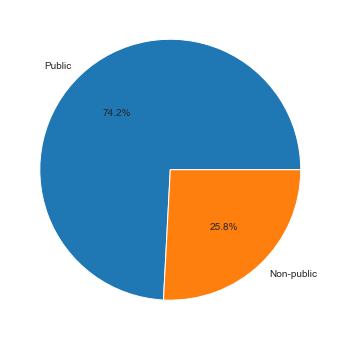

In [16]:
plt.subplots(figsize=(14,6))
plt.pie(data.school_type.value_counts(), labels=data.school_type.value_counts().index, autopct='%1.1f%%')

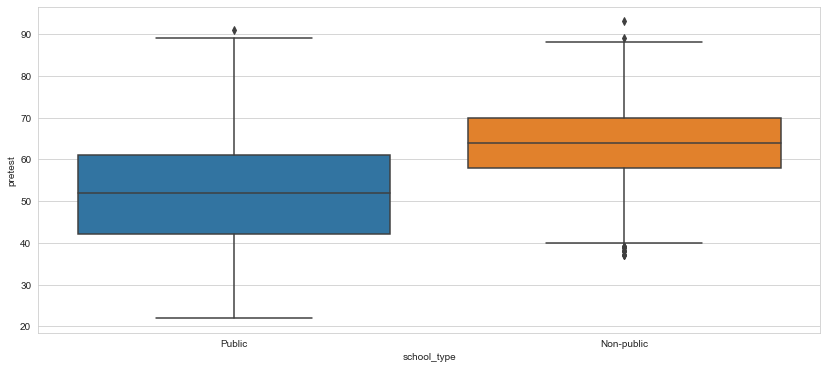

In [17]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=data,x="school_type",y="pretest")

<h3>pretest</h3>

In [18]:
data.pretest.describe()

count    2133.000000
mean       54.955931
std        13.563101
min        22.000000
25%        44.000000
50%        56.000000
75%        65.000000
max        93.000000
Name: pretest, dtype: float64

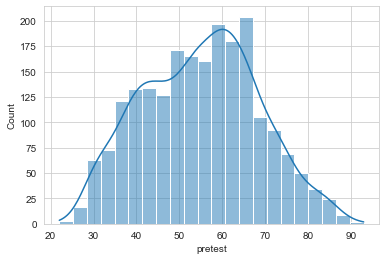

In [19]:
sns.histplot(x=data.pretest, kde=True)

<h3>posttest</h3>

In [20]:
data.posttest.describe()

count    2133.000000
mean       67.102203
std        13.986789
min        32.000000
25%        56.000000
50%        68.000000
75%        77.000000
max       100.000000
Name: posttest, dtype: float64

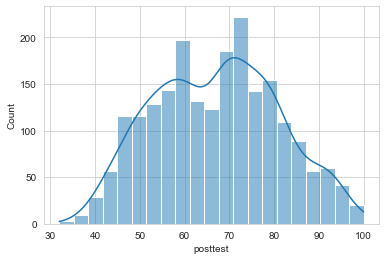

In [21]:
sns.histplot(x=data.posttest, kde=True)

Descriptive statistics of numeric data and correlation

In [22]:
data.describe()

,n_student,pretest,posttest
count,2133.000000,2133.000000,2133.000000
mean,22.796531,54.955931,67.102203
std,4.228893,13.563101,13.986789
min,14.000000,22.000000,32.000000
25%,20.000000,44.000000,56.000000
50%,22.000000,56.000000,68.000000
75%,27.000000,65.000000,77.000000
max,31.000000,93.000000,100.000000


In [23]:
correlation = data.corr()
correlation

,n_student,pretest,posttest
n_student,1.000000,-0.499253,-0.504886
pretest,-0.499253,1.000000,0.950884
posttest,-0.504886,0.950884,1.000000


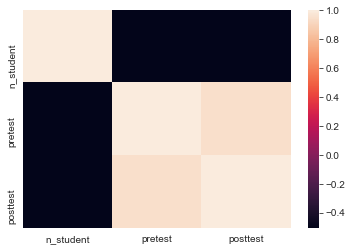

In [24]:
sns.heatmap(correlation)

<h1>Preprocessing</h1>

As student_id is unique for every sample, it has no contribution for estimation

In [25]:
data.drop(['student_id'], axis=1, inplace=True)

Encoding categorical data and feature scaling numeric data

In [26]:
featuresToEncode = ['school', 'school_setting', 'school_type', 'classroom',
       'teaching_method', 'gender', 'lunch']
featuresToScale = ['n_student','pretest']

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for feature in featuresToEncode:
    data[feature] = le.fit_transform(data[feature])
data

,school,school_setting,school_type,classroom,teaching_method,n_student,gender,lunch,pretest,posttest
0,4,1,1,71,0,28.0,1,1,57.0,73.0
1,17,1,0,60,1,20.0,0,1,61.0,73.0
2,18,0,0,32,0,20.0,1,1,59.0,71.0
3,12,0,1,30,1,21.0,1,0,57.0,67.0
4,8,2,1,45,1,28.0,0,1,37.0,44.0
...,...,...,...,...,...,...,...,...,...,...
2128,14,2,1,70,1,22.0,1,0,53.0,63.0
2129,11,0,1,57,1,22.0,1,1,46.0,50.0
2130,8,2,1,61,1,24.0,1,0,44.0,54.0
2131,12,0,1,51,1,19.0,0,0,53.0,71.0


In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
featuresScaled = pd.DataFrame(scaler.fit_transform(data[featuresToScale]),columns=featuresToScale)
featuresScaled.describe()

,n_student,pretest
count,2133.000000,2133.000000
mean,0.517443,0.464168
std,0.248758,0.191030
min,0.000000,0.000000
25%,0.352941,0.309859
50%,0.470588,0.478873
75%,0.764706,0.605634
max,1.000000,1.000000


In [29]:
data_noscaling = data
data[featuresToScale] = featuresScaled
data

,school,school_setting,school_type,classroom,teaching_method,n_student,gender,lunch,pretest,posttest
0,4,1,1,71,0,0.823529,1,1,0.492958,73.0
1,17,1,0,60,1,0.352941,0,1,0.549296,73.0
2,18,0,0,32,0,0.352941,1,1,0.521127,71.0
3,12,0,1,30,1,0.411765,1,0,0.492958,67.0
4,8,2,1,45,1,0.823529,0,1,0.211268,44.0
...,...,...,...,...,...,...,...,...,...,...
2128,14,2,1,70,1,0.470588,1,0,0.436620,63.0
2129,11,0,1,57,1,0.470588,1,1,0.338028,50.0
2130,8,2,1,61,1,0.588235,1,0,0.309859,54.0
2131,12,0,1,51,1,0.294118,0,0,0.436620,71.0


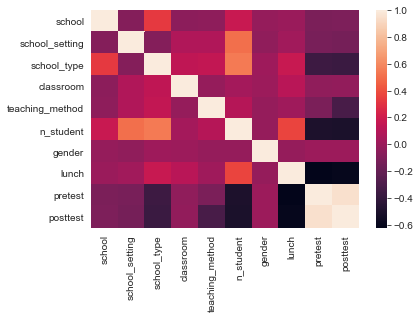

In [30]:
sns.heatmap(data.corr())

<h1>Building Model</h1>

In [31]:
X = data.drop('posttest', axis=1)
y = data.posttest

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Let's use OLS as baseline model

In [42]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
lr = LinearRegression().fit(X_train, y_train)
lr_predtrain = lr.predict(X_train)
lr_predtest = lr.predict(X_test)
r2_score(lr_predtrain, y_train), r2_score(lr_predtest, y_test)

(0.9434594013745563, 0.9458802203227242)

In [34]:
lr.coef_, lr.intercept_

(array([-1.35053410e-02,  1.47124009e-01,  1.93349777e-01, -1.51448386e-03,
        -5.94728375e+00, -2.07563996e+00, -2.78947309e-01, -8.06821151e-01,
         6.54697784e+01]),
 41.992069787875565)

We observed a high correlation between pretest and posttest, let's see how using only pretest to predict posttest will do

In [35]:
pretest_train, pretest_test, y_train1, y_test1 = train_test_split(X.pretest.to_numpy().reshape(-1,1), y, random_state=0)
lr = LinearRegression().fit(pretest_train, y_train1)
lr_predtrain1 = lr.predict(pretest_train)
lr_predtest1 = lr.predict(pretest_test)
r2_score(lr_predtrain1, y_train1), r2_score(lr_predtest1, y_test1)

(0.8965631003343273, 0.8835516170185446)

We got pretty decent scores, but linear regression (OLS) underfits the data. We need an algorithm that can build a more complex model. First, let's see the results of K-Nearest Neighbors

In [36]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10).fit(X_train, y_train)
knn_predtrain = knn.predict(X_train)
knn_predtest = knn.predict(X_test)
r2_score(knn_predtrain, y_train), r2_score(knn_predtest, y_test)

(0.95518632124633, 0.9457439552107632)